In [196]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE

In [184]:
file_name = 'MDP_Original_data.csv'
dataset=pd.read_csv(file_name)

In [185]:
data=dataset.iloc[:,6:]
len(data.columns)

124

In [186]:
cat=[]
for k, v in data.nunique().to_dict().items():
    if v<=5 and data[k].dtype == 'int64' :
        cat.append(k)
df_cat=data[cat]
df_cont = data[data.columns.difference(cat)]

In [187]:
df_cat.shape

(7168, 22)

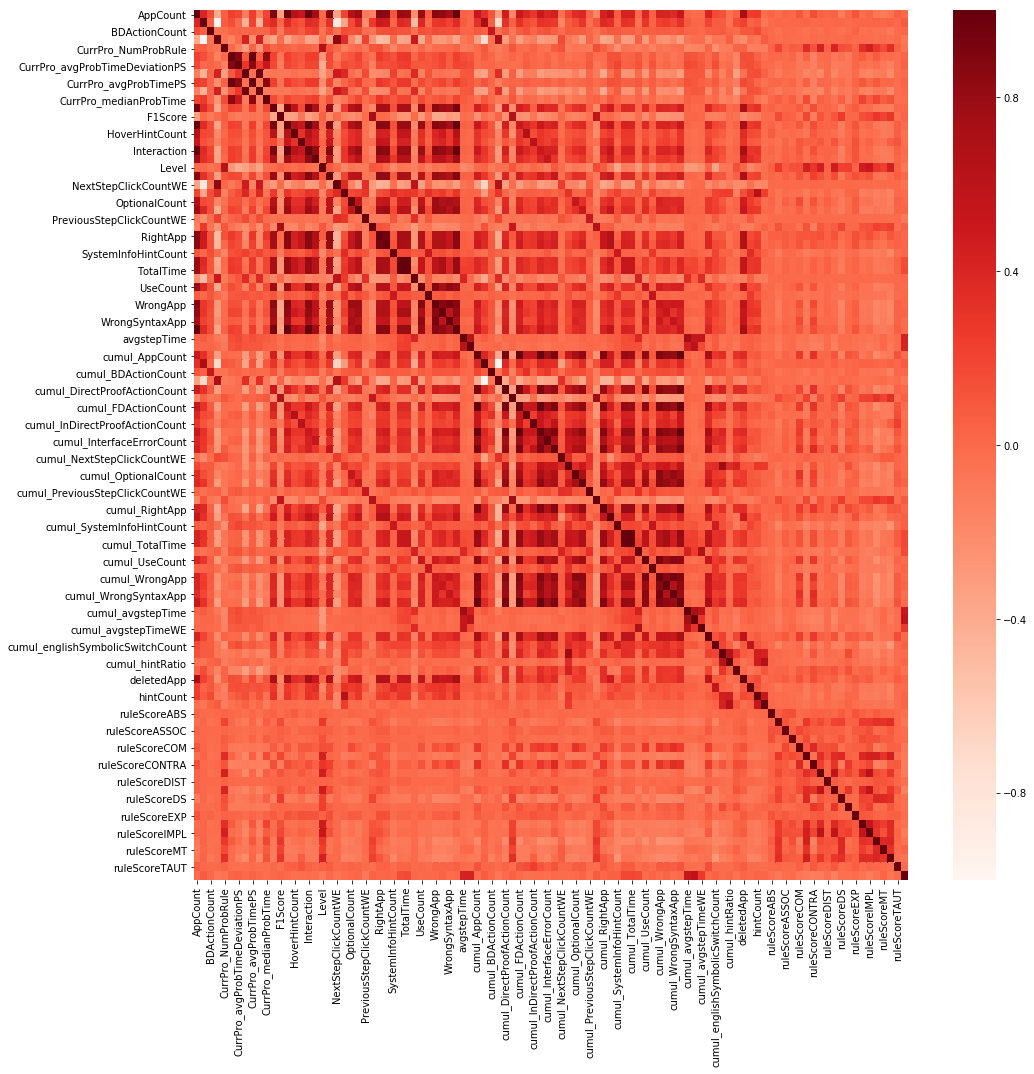

In [136]:
plt.figure(figsize=(16,16))
cor = df_cont.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [189]:
#(corr_matrix.iloc[i, j] <= low_t and corr_matrix.iloc[i, j] >= -low_t)
              
def correlation(dataset, low_t, high_t):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] <= - high_t or corr_matrix.iloc[i, j] >= high_t and (corr_matrix.columns[j] not in col_corr)):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print (dataset.shape)
    
correlation(df_cont, 0.2,0.8)
correlation(df_cat, 0.2,0.8)

(7168, 72)
(7168, 17)


In [106]:
vec = list(df_cont.columns)
bins=5
temp = pd.DataFrame()
for i in range(0,len(vec)):
    if df_cont[vec[i]].dtype != 'int64':
        x = pd.cut(df_cont[vec[i]],bins,labels=False)
        temp[vec[i]] = x
    else:
        temp[vec[i]]=df_cont[vec[i]]


In [190]:
bigdata = pd.concat([df_cont, df_cat], axis=1)

In [191]:
print (bigdata.shape)

(7168, 89)


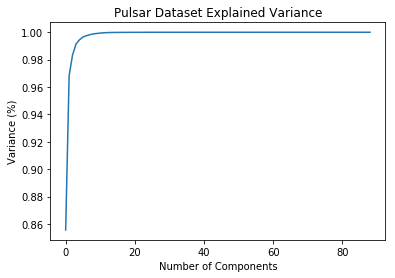

In [192]:
pca = PCA().fit(bigdata)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()
#

In [193]:
pca = PCA(n_components=8)
dataset = pca.fit_transform(bigdata)
final = pd.DataFrame(dataset)

In [194]:
vec = list(final.columns)
bins=5
temp = pd.DataFrame()
for i in range(0,len(vec)):
    if final[vec[i]].dtype != 'int64':
        x = pd.cut(final[vec[i]],bins,labels=False)
        temp[vec[i]] = x
    else:
        temp[vec[i]]=final[vec[i]]


In [195]:
temp.to_csv('disc.csv', index=False)

In [182]:
len(temp)

7168